In [1]:
import pandas as pd
import os
os.chdir(r"C:\Users\Gilseung\Google 드라이브\작업\온라인 강의 머신러닝 성능 향상을 위한 데이터 탐색과 전처리 심화\데이터\실습 데이터 - #1")

In [2]:
df = pd.read_csv("2019년_시간대별_상품판매량.csv", engine = "python")
df.head()

,날짜,상품1,상품2,상품3
0,2019-01-01,48,48,50
1,2019-01-02,48,44,49
2,2019-01-03,48,54,50
3,2019-01-04,53,42,48
4,2019-01-05,46,42,50


In [3]:
# 기본 환경설정
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (30, 10)

#### pyplot을 사용한 그래프 그리기

In [4]:
np.cumsum([1, 2, 3]) # 누적합 반환

array([1, 3, 6], dtype=int32)

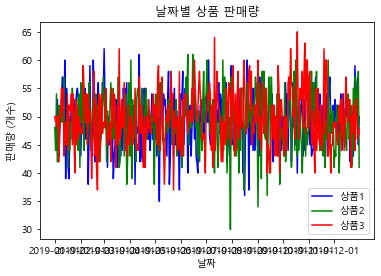

In [6]:
# 그래프 기본 설정
plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")

xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, df['날짜'].loc[xtick_range]) 

plt.plot(df['날짜'], df['상품1'], label = '상품1', color = 'b')
plt.plot(df['날짜'], df['상품2'], label = '상품2', color = 'g')
plt.plot(df['날짜'], df['상품3'], label = '상품3', color = 'r')

plt.legend()

#### DataFrame을 이용하여 직접 그래프 그리기

([<matplotlib.axis.XTick at 0x1ba9646be48>,
 <a list of 12 Text xticklabel objects>)

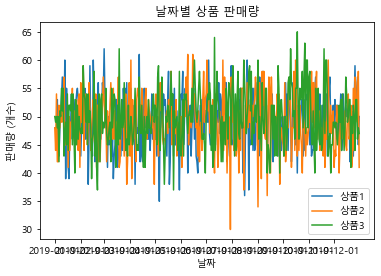

In [7]:
# 그래프 기본 설정
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
df.plot(kind = 'line', x = '날짜', y = ['상품1', '상품2', '상품3'])

plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")
plt.xticks(xtick_range, df['날짜'].loc[xtick_range])

#### groupby를 이용한 그래프 그리기

In [8]:
df['날짜'].head()

0    2019-01-01
1    2019-01-02
2    2019-01-03
3    2019-01-04
4    2019-01-05
Name: 날짜, dtype: object

In [9]:
df['날짜'].str.split('-', expand = True).head()

,0,1,2
0,2019,01,01
1,2019,01,02
2,2019,01,03
3,2019,01,04
4,2019,01,05


In [10]:
df['월'] = df['날짜'].str.split('-', expand = True).iloc[:, 1]

In [11]:
df.head()

,날짜,상품1,상품2,상품3,월
0,2019-01-01,48,48,50,01
1,2019-01-02,48,44,49,01
2,2019-01-03,48,54,50,01
3,2019-01-04,53,42,48,01
4,2019-01-05,46,42,50,01


In [12]:
df.groupby('월')[['상품1', '상품2', '상품3']].sum()

,상품1,상품2,상품3
월,,,
01,1545,1501,1521
02,1391,1388,1372
03,1488,1510,1514
04,1461,1483,1449
05,1485,1511,1530
06,1473,1508,1513
07,1548,1519,1558
08,1494,1545,1599
09,1506,1480,1464


([<matplotlib.axis.XTick at 0x1ba96529b70>,
 <a list of 12 Text xticklabel objects>)

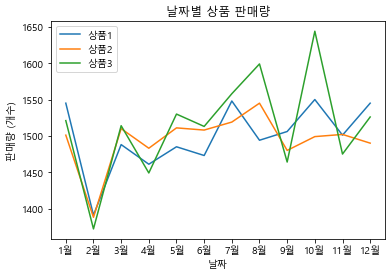

In [13]:
df.groupby('월')[['상품1', '상품2', '상품3']].sum().plot(kind = 'line') # default를 썼으므로, 인덱스가 x축으로 모든 컬럼이 y축으로 들어감
plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")
plt.xticks(range(12), [str(i + 1) + '월' for i in range(12)])